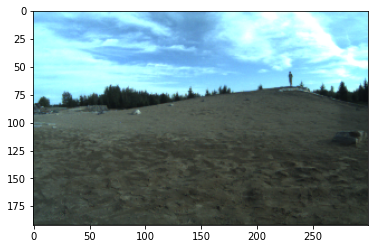

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img1 = plt.imread('Frame_0.png')
img2 = plt.imread('Frame_2.png')

scale_percent = 40 # percent of original size
width = int(img1.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
dim = (width, height)

img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_LINEAR)
img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_LINEAR)

img1 = (img1*255).astype(np.uint8)
img2 = (img2*255).astype(np.uint8)

plt.imshow(img1)

In [25]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

def detect_and_match(img1, img2, Draw = 0):
    """
    This function detects keypoints between 2 images using a corner detection method
    and then applies SIFT to determine scale-invariant descriptors that can be used to
    find matches between the images. After doing this, the kNN matching algorithm 
    is applied with 2 nearest neighbours. The 2 matches per keypoint of the left image
    are then passed through Lowe's ratio test to determine one true match (removes False positives).
    
    Inputs:
    
    imgL: A uint8 RGB image
    imgR: A uint8 RGB image
    Draw: Plot matches and two images to visualize function working (default = no visualization)
    
    Returns:
    
    Matches: List of matches that pass the ratio test
    
    """
    #Make sure image types are uint8
    imgL = img1.astype(np.uint8)  
    imgR = img2.astype(np.uint8) 
    
    #Convert images to grayscale
    gray_left = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
    
    #Create instance of SIFT and find keypoints in left and right grayscale images
    sift = cv2.SIFT_create(200)
    kpL, desL = sift.detectAndCompute(gray_left,None)
    kpR, desR = sift.detectAndCompute(gray_right,None)

    #Match keypoints using KNN, with a neighbourhood of 2
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(desL, desR, k=2)
    
    # Apply ratio test
    Matches = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            Matches.append([m])
    
    if Draw != 0:
        img3 = cv2.drawMatchesKnn(gray_left,kpL,gray_right,kpR,Matches,flags=2, outImg=None)
        plt.imshow(img3),plt.show()
    else:
        pass

    return Matches

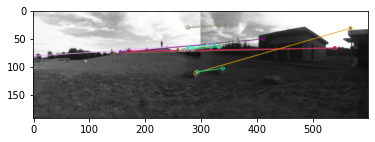

In [26]:
Mches = detect_and_match(img1, img2, 1)


In [1]:
import cv2
cv2.S

In [5]:
def RANSAC(Matches):


    return Matches_inliers

In [6]:
def homography():
    
    return H

In [7]:
def bilinear_interp():
    
    return val

In [8]:
def warping():
    
    return stitched_img

In [9]:
def vignetting(stitched_img):
    
    return stitched_img_fixed